In [10]:
import json
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity as SSIM, normalized_root_mse as NRMSE

In [11]:
def normalize_min_max(x):
    x -= np.min(x)
    x *= 255 / np.max(x)

def SSIM_custom(x, y):
    mu_x = np.mean(x)
    mu_y = np.mean(y)
    sigma_x = np.var(x)
    sigma_y = np.var(y)
    sigma_xy = np.mean((x - mu_x) * (y - mu_y))
    L = 255
    c1 = (0.01 * L) ** 2
    c2 = (0.03 * L) ** 2
    return (2 * mu_x * mu_y + c1) * (2 * sigma_xy + c2) / ((mu_x ** 2 + mu_y ** 2 + c1) * (sigma_x + sigma_y + c2))

def STRESS(a, b):
    a_norm = np.sum(a ** 2)
    b_norm = np.sum(b ** 2)
    ab_scalar = np.sum(a * b) ** 2
    return np.sqrt(1 - ab_scalar / (a_norm * b_norm))

In [12]:
def read_reconstruction(info_file):
    with open(info_file, 'r') as f:
        data = json.load(f)
        
    height = data['height']
    depth = data['depth']
    width = data['width']
    format = data['format']
        
    folder = os.path.dirname(info_file)
    
    recon = np.empty((height, depth, width))
    
    for i in range(height):
        recon[i] = np.array(Image.open(os.path.join(folder, str(i) + format)))
        
    return recon

In [13]:
def calculate_metrics(true_recon_info, test_recon_info):
    true_recon = read_reconstruction(true_recon_info)
    test_recon = read_reconstruction(test_recon_info)
    height = min(true_recon.shape[0], test_recon.shape[0])
    depth = min(true_recon.shape[1], test_recon.shape[1])
    width = min(true_recon.shape[2], test_recon.shape[2])
    true_recon = true_recon[:height, :depth, :width]
    test_recon = test_recon[:height, :depth, :width]
    normalize_min_max(true_recon)
    normalize_min_max(test_recon)
#     print(true_recon.shape, test_recon.shape)
    
    ssim_score = SSIM_custom(true_recon, test_recon)
    nrmse_score = NRMSE(true_recon, test_recon)
    stress_score = STRESS(true_recon, test_recon)

#     print(f'SSIM   {ssim_score:.4f}')
#     print(f'NRMSE  {nrmse_score:.4f}')
#     print(f'STRESS {stress_score:.4f}')
    print(f'{ssim_score:.4f}')
    print(f'{nrmse_score:.4f}')
    print(f'{stress_score:.4f}')

In [24]:
def calculate_for(recs_names, stitchers_names):
    for rec_name in recs_names:
        for stitcher_name in stitchers_names:
            print(rec_name, stitcher_name)
            true_path = 'testing/' + rec_name + '/true/info.json'
            test_path = 'testing/' + rec_name + '/' + stitcher_name + '/info.json'
            calculate_metrics(true_path, test_path)
        
        
recs_names = [
        "bicycle_wheel_x256",
        "big_wheel_x256",
        "nonuniform_2_x256",
        "pores_2_x256"]

stitchers_names = [
        "l2_direct_alignment",
        "opencv_sift_2d",
        "sift_2d"]

calculate_for(recs_names, stitchers_names)

bicycle_wheel_x256 l2_direct_alignment
0.7086
0.2536
0.2535
bicycle_wheel_x256 opencv_sift_2d
0.7089
0.2535
0.2534
bicycle_wheel_x256 sift_2d
0.7089
0.2535
0.2534
big_wheel_x256 l2_direct_alignment
0.6370
0.2128
0.2109
big_wheel_x256 opencv_sift_2d
0.6413
0.2115
0.2097
big_wheel_x256 sift_2d
0.6416
0.2115
0.2096
nonuniform_2_x256 l2_direct_alignment
0.9312
0.2593
0.2510
nonuniform_2_x256 opencv_sift_2d
0.9438
0.2354
0.2273
nonuniform_2_x256 sift_2d
0.9406
0.2423
0.2329
pores_2_x256 l2_direct_alignment
0.8520
0.1069
0.0830
pores_2_x256 opencv_sift_2d
0.8217
0.1138
0.1052
pores_2_x256 sift_2d
0.7573
0.1262
0.1052


In [15]:
def calculate_for(recs_names, stitchers_names):
    for rec_name in recs_names:
        for stitcher_name in stitchers_names:
            print(rec_name, stitcher_name)
            true_path = 'testing/' + rec_name + '/true/info.json'
            test_path = 'testing/' + rec_name + '/' + stitcher_name + '/info.json'
            calculate_metrics(true_path, test_path)
        
        
recs_names = [
        "bicycle_wheel_x256",
        "big_wheel_x256",
        "nonuniform_2_x256",
        "pores_2_x256"]

stitchers_names = ["sift_3d"]

calculate_for(recs_names, stitchers_names)

bicycle_wheel_x256 sift_3d
0.7087
0.2536
0.2535
big_wheel_x256 sift_3d
0.6392
0.2122
0.2103
nonuniform_2_x256 sift_3d
0.9360
0.2555
0.2361
pores_2_x256 sift_3d
0.8406
0.1087
0.0995


In [23]:
recs_names = [
        "bicycle_wheel_x256",
        "big_wheel_x256",
        "nonuniform_2_x256",
        "pores_2_x256"]

stitchers_names = [
        "l2_direct_alignment",
        "opencv_sift_2d",
        "sift_2d",
        "sift_3d"]

def compare_params():
    for rec_name in recs_names:
        for stitcher_name in stitchers_names:
            print(rec_name, stitcher_name)
            true_path = 'testing/' + rec_name + '/true/params.json'
            test_path = 'testing/' + rec_name + '/' + stitcher_name + '/params.json'
            with open(true_path, 'r') as f:
                true_data = json.load(f)
            with open(test_path, 'r') as f:
                test_data = json.load(f)
                
            trp = true_data['params'][1]
            tep = test_data['params'][1]
            
            error = 0
            for p in ['offset_x', 'offset_y', 'offset_z']:
                error += abs(trp[p] - tep[p])
                
            error /= 256
            print(f'{error:.4f}')

            
compare_params()

bicycle_wheel_x256 l2_direct_alignment
0.0273
bicycle_wheel_x256 opencv_sift_2d
0.0039
bicycle_wheel_x256 sift_2d
0.0039
bicycle_wheel_x256 sift_3d
0.0039
big_wheel_x256 l2_direct_alignment
0.0273
big_wheel_x256 opencv_sift_2d
0.0039
big_wheel_x256 sift_2d
0.0078
big_wheel_x256 sift_3d
0.0000
nonuniform_2_x256 l2_direct_alignment
0.0430
nonuniform_2_x256 opencv_sift_2d
0.0195
nonuniform_2_x256 sift_2d
0.0273
nonuniform_2_x256 sift_3d
0.0273
pores_2_x256 l2_direct_alignment
0.0352
pores_2_x256 opencv_sift_2d
0.0469
pores_2_x256 sift_2d
0.1523
pores_2_x256 sift_3d
0.0273


In [13]:
recs_names = [
        "bicycle_wheel_x512",
        "big_wheel_x512",
        "nonuniform_2_x512",
        "pores_2_x512"]

stitchers_names = [
        "l2_direct_alignment",
        "opencv_sift_2d",
        "sift_2d"]

calculate_for(recs_names, stitchers_names)

bicycle_wheel_x512 l2_direct_alignment
0.9987
0.0185
0.0185
bicycle_wheel_x512 opencv_sift_2d
0.9998
0.0065
0.0065
bicycle_wheel_x512 sift_2d
0.9998
0.0065
0.0065
big_wheel_x512 l2_direct_alignment
0.9082
0.1315
0.0855
big_wheel_x512 opencv_sift_2d
0.9211
0.1279
0.0792
big_wheel_x512 sift_2d
0.9211
0.1279
0.0792
nonuniform_2_x512 l2_direct_alignment
0.9606
0.1821
0.1767
nonuniform_2_x512 opencv_sift_2d
0.9695
0.1655
0.1495
nonuniform_2_x512 sift_2d
0.9768
0.1399
0.1354
pores_2_x512 l2_direct_alignment
0.9564
0.0511
0.0506
pores_2_x512 opencv_sift_2d
0.9679
0.0440
0.0433
pores_2_x512 sift_2d
0.9444
0.0576
0.0572


### `nonuniform` with offset

In [7]:
calculate_metrics('reconstructions/stitched/nonuniform/true/info.json',
                  'reconstructions/stitched/nonuniform/direct_alignment/info.json')
calculate_metrics('reconstructions/stitched/nonuniform/true/info.json',
                  'reconstructions/stitched/nonuniform/opencv_sift_2d/info.json')
calculate_metrics('reconstructions/stitched/nonuniform/true/info.json',
                  'reconstructions/stitched/nonuniform/sift_2d/info.json')

(512, 256, 256) (512, 256, 256)
0.9293
0.3079
0.2959
(512, 256, 256) (512, 256, 256)
0.8609
0.4351
0.4163
(508, 256, 256) (508, 256, 256)
0.9185
0.3299
0.3204


### `nonuniform_2` with offset

In [8]:
calculate_metrics('reconstructions/stitched/nonuniform_2/true/info.json',
                  'reconstructions/stitched/nonuniform_2/direct_alignment/info.json')
calculate_metrics('reconstructions/stitched/nonuniform_2/true/info.json',
                  'reconstructions/stitched/nonuniform_2/opencv_sift_2d/info.json')
calculate_metrics('reconstructions/stitched/nonuniform_2/true/info.json',
                  'reconstructions/stitched/nonuniform_2/sift_2d/info.json')

(512, 512, 512) (512, 512, 512)
0.9672
0.1633
0.1621
(509, 512, 512) (509, 512, 512)
0.9709
0.1532
0.1527
(510, 512, 512) (510, 512, 512)
0.8506
0.3474
0.3418


### `big_wheel` with offset

In [9]:
calculate_metrics('reconstructions/stitched/big_wheel/true/info.json',
                  'reconstructions/stitched/big_wheel/direct_alignment/info.json')
calculate_metrics('reconstructions/stitched/big_wheel/true/info.json',
                  'reconstructions/stitched/big_wheel/opencv_sift_2d/info.json')
calculate_metrics('reconstructions/stitched/big_wheel/true/info.json',
                  'reconstructions/stitched/big_wheel/sift_2d/info.json')

(511, 512, 512) (511, 512, 512)
0.7353
0.3426
0.1302
(512, 512, 512) (512, 512, 512)
0.7258
0.3432
0.1321
(512, 512, 512) (512, 512, 512)
0.7182
0.3436
0.1337


### `bicycle_wheel` with offset

In [10]:
calculate_metrics('reconstructions/stitched/bicycle_wheel/true/info.json',
                  'reconstructions/stitched/bicycle_wheel/direct_alignment/info.json')
calculate_metrics('reconstructions/stitched/bicycle_wheel/true/info.json',
                  'reconstructions/stitched/bicycle_wheel/opencv_sift_2d/info.json')
calculate_metrics('reconstructions/stitched/bicycle_wheel/true/info.json',
                  'reconstructions/stitched/bicycle_wheel/sift_2d/info.json')

(512, 512, 512) (512, 512, 512)
0.9500
0.1382
0.1174
(512, 512, 512) (512, 512, 512)
0.9497
0.1385
0.1177
(512, 512, 512) (512, 512, 512)
0.9492
0.1391
0.1184


### `pores_2` with offset

In [11]:
calculate_metrics('reconstructions/stitched/pores_2/true/info.json',
                  'reconstructions/stitched/pores_2/direct_alignment/info.json')
calculate_metrics('reconstructions/stitched/pores_2/true/info.json',
                  'reconstructions/stitched/pores_2/opencv_sift_2d/info.json')
calculate_metrics('reconstructions/stitched/pores_2/true/info.json',
                  'reconstructions/stitched/pores_2/sift_2d/info.json')

(508, 512, 512) (508, 512, 512)
0.9250
0.0704
0.0648
(511, 512, 512) (511, 512, 512)
0.9493
0.0596
0.0530
(494, 512, 512) (494, 512, 512)
0.8377
0.1607
0.1304


### `nonuniform_2_x128` with offset

In [5]:
calculate_metrics('reconstructions/stitched/nonuniform_2/true_x128/info.json',
                  'reconstructions/stitched/nonuniform_2/direct_alignment_x128/info.json')
calculate_metrics('reconstructions/stitched/nonuniform_2/true_x128/info.json',
                  'reconstructions/stitched/nonuniform_2/opencv_sift_2d_x128/info.json')
calculate_metrics('reconstructions/stitched/nonuniform_2/true_x128/info.json',
                  'reconstructions/stitched/nonuniform_2/sift_2d_x128/info.json')
calculate_metrics('reconstructions/stitched/nonuniform_2/true_x128/info.json',
                  'reconstructions/stitched/nonuniform_2/sift_3d_x128/info.json')

(128, 128, 128) (128, 128, 128)
0.9447
0.2551
0.2445
(126, 128, 128) (126, 128, 128)
0.0144
6.4515
0.7404
(128, 128, 128) (128, 128, 128)
0.8008
0.5193
0.4298
(128, 128, 128) (128, 128, 128)
0.9447
0.2551
0.2445


### `big_wheel_x128` with offset

In [6]:
calculate_metrics('reconstructions/stitched/big_wheel/true_x128/info.json',
                  'reconstructions/stitched/big_wheel/direct_alignment_x128/info.json')
calculate_metrics('reconstructions/stitched/big_wheel/true_x128/info.json',
                  'reconstructions/stitched/big_wheel/opencv_sift_2d_x128/info.json')
calculate_metrics('reconstructions/stitched/big_wheel/true_x128/info.json',
                  'reconstructions/stitched/big_wheel/sift_2d_x128/info.json')
calculate_metrics('reconstructions/stitched/big_wheel/true_x128/info.json',
                  'reconstructions/stitched/big_wheel/sift_3d_x128/info.json')

(128, 128, 128) (128, 128, 128)
0.8631
0.1968
0.1884
(128, 128, 128) (128, 128, 128)
0.8312
0.2228
0.2067
(126, 128, 128) (126, 128, 128)
0.8351
0.2160
0.2075
(128, 128, 128) (128, 128, 128)
0.8631
0.1968
0.1884


---

### `pores_2` without offset

In [30]:
calculate_metrics('reconstructions/stitched/pores_2/true/info.json',
                  'reconstructions/stitched/pores_2/direct_alignment_s/info.json')
calculate_metrics('reconstructions/stitched/pores_2/true/info.json',
                  'reconstructions/stitched/pores_2/opencv_sift_2d_s/info.json')

(512, 512, 512) (512, 512, 512)
SSIM   1.0000
NRMSE  0.0000
STRESS 0.0000
(511, 512, 512) (511, 512, 512)
SSIM   0.9967
NRMSE  0.0135
STRESS 0.0135


### `small_wheel` without offset

In [77]:
calculate_metrics('reconstructions/stitched/small_wheel/true/info.json',
                  'reconstructions/stitched/small_wheel/opencv_sift_2d/info.json')

(512, 512, 512) (512, 512, 512)
SSIM   1.0
NRMSE  0.0
STRESS 0.0


___
### Draft

In [ ]:
recon = read_reconstruction('../stacked-tomoscan-gen/demos/pores_2/0/info.json')

SSIM   0.4127813615203427
NRMSE  0.2918032035354971
STRESS 0.0


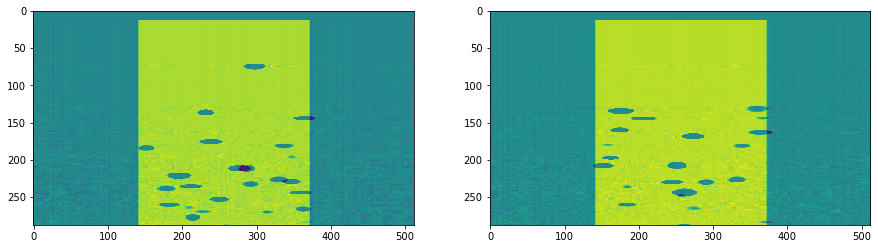

In [50]:
true_img = recon[:,250,:]
test_img = recon[:,256,:]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.imshow(true_img)
plt.subplot(122)
plt.imshow(test_img)

# score, diff = SSIM(before_gray, after_gray, full=True)
ssim_score = SSIM(true_img, test_img)
nrmse_score = NRMSE(true_img, test_img)
stress_score = 0.0
print('SSIM  ', ssim_score)
print('NRMSE ', nrmse_score)
print('STRESS', stress_score)